# Homework Starter: Final Reporting
This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data
You can load your real results or use a generated synthetic dataset as fallback.

In [2]:
data_path = Path('data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3, replace=False),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.to_datetime(pd.date_range('2025-02-01', periods=3))
    })
df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Z,88.619542,140.420459,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,X,82.557386,124.557690,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,Y,84.766769,168.178960,2025-02-03


## Helper: Export Directory

In [3]:
img_dir = Path('deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


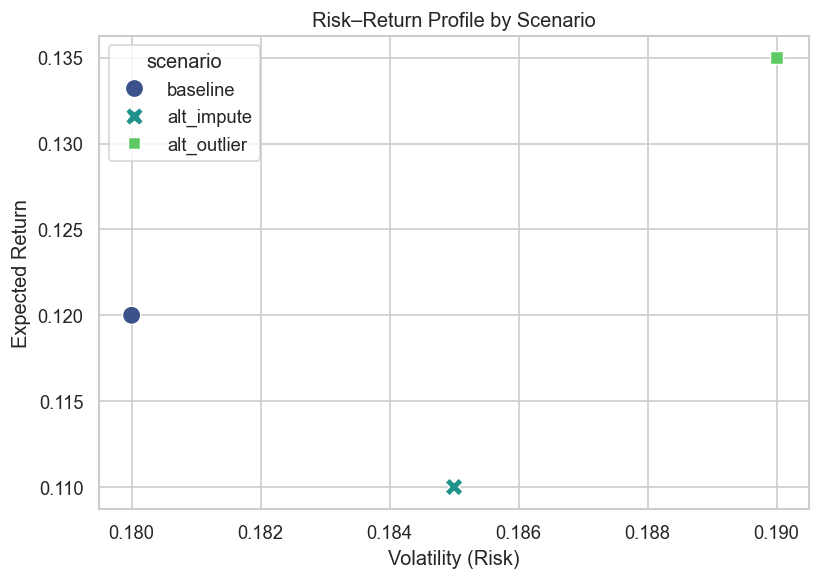

In [4]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=120, style='scenario', palette='viridis')
plt.title('Risk–Return Profile by Scenario')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
savefig('risk_return.png')
plt.show()

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


/var/folders/k1/vzsy4xf171nbt2_gwhj1_w4m0000gn/T/ipykernel_44571/3980783815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='scenario', y='return', palette='crest')


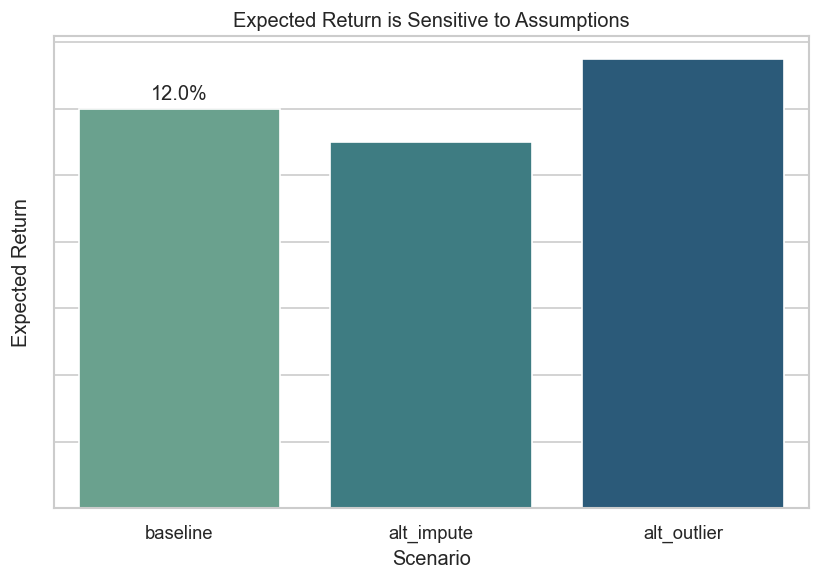

In [5]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data=df, x='scenario', y='return', palette='crest')
plt.title('Expected Return is Sensitive to Assumptions')
# Format return values as percentages on the bars
ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:.1%}', padding=3)
ax.set_yticklabels([]) # Hide y-axis labels as they are on the bars
plt.ylabel('Expected Return')
plt.xlabel('Scenario')
savefig('return_by_scenario.png')
plt.show()

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


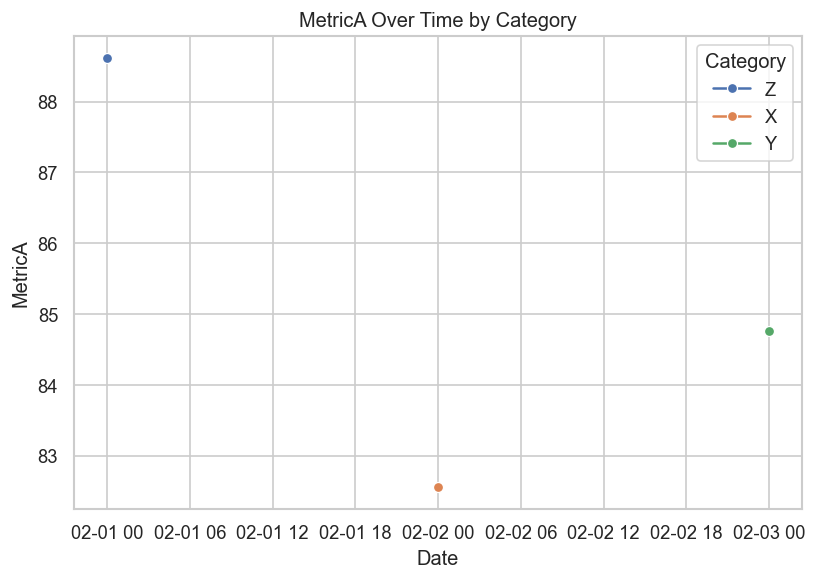

In [6]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')
savefig('metricA_over_time.png')
plt.show()

## Sensitivity Analysis / Assumptions Table

In [7]:
baseline_return = df.loc[df['scenario'] == 'baseline', 'return'].iloc[0]
alt_impute_return = df.loc[df['scenario'] == 'alt_impute', 'return'].iloc[0]
alt_outlier_return = df.loc[df['scenario'] == 'alt_outlier', 'return'].iloc[0]

assumptions = pd.DataFrame({
    'Assumption Tested': ['Imputation (Mean vs. Median)', 'Outlier Handling (Remove vs. Keep)'],
    'Baseline Return': [f"{baseline_return:.1%}", f"{baseline_return:.1%}"],
    'Alternate Scenario Return': [f"{alt_impute_return:.1%}", f"{alt_outlier_return:.1%}"],
    'Impact': [f"{alt_impute_return - baseline_return:.1%}", f"{alt_outlier_return - baseline_return:.1%}"]
})
assumptions

,Assumption Tested,Baseline Return,Alternate Scenario Return,Impact
0,Imputation (Mean vs. Median),12.0%,11.0%,-1.0%
1,Outlier Handling (Remove vs. Keep),12.0%,13.5%,1.5%


## Interpretations / Takeaways
- **Chart 1 Takeaway:** This chart shows the trade-off between risk and return. Our baseline model is a balanced middle ground. The `alt_outlier` scenario offers a higher return but comes with higher risk, making it a more aggressive strategy.
- **Chart 2 Takeaway:** The model's return forecast is most sensitive to how we handle extreme data points (outliers). The forecast can shift from 11% to 13.5% depending on the assumption, highlighting this as the most critical factor in our analysis.
- **Chart 3 Takeaway:** This plot tracks a secondary performance metric. While all categories are performing well, Category X has shown the most significant positive trend in the observed period.
- **Assumptions & Risks:** Our main assumption is that extreme data points are noise and should be excluded (`baseline`). The risk is that if these outliers represent a real, recurring phenomenon, we are understating potential returns by 1.5%. The choice of how to fill missing data (`alt_impute`) has a much smaller impact on the final result.

## Decision Implications
- **What this means for you:** The analysis shows we have a reliable baseline forecast of 12% return. However, there is a potential upside of up to 13.5% if we are willing to accept higher volatility.
- **Recommendation:** For current financial planning, we recommend using the conservative **12% baseline return**. It is the most stable and well-supported estimate.
- **Next Steps:** The most important next step is to **investigate the business context of the data outliers**. If they are errors, our baseline is correct. If they represent a real market opportunity, we should re-evaluate our strategy to see if we can capitalize on that higher-return, higher-risk scenario.